# Analysing Bio Medical images

In [1]:
import pathlib
import os, random
import imageio                      # reading images
import matplotlib.pyplot as plt
import numpy as np

im_path = pathlib.Path('Data/chest/')

files = []        
for currentFile in im_path.iterdir():  
    im_file = currentFile        
    im = imageio.imread(im_file)
    files.append(im)
    
print('Images in drive', len(files))

Images in drive 5


In [2]:
[i for i in range(len(files))]

# selecting a random image from the directory. 
img_no = random.choice(np.arange(len(files)))

In [3]:
# Print image attributes
print('Image type:', type(files[img_no]))
print('Shape of image array:', files[img_no].shape)

Image type: <class 'imageio.core.util.Image'>
Shape of image array: (512, 512)


In [4]:
# Print the available metadata fields
print(files[img_no].meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.231606570874529734865142509646'), ('StudyDate', '20040529'), ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 61), ('ImagePositionPatient', (-250.0, -250.0, -193.7)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('Sa

In [5]:
# print all meta data
im.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

### Plot Images with a greater contrast. 

(-0.5, 511.5, 511.5, -0.5)

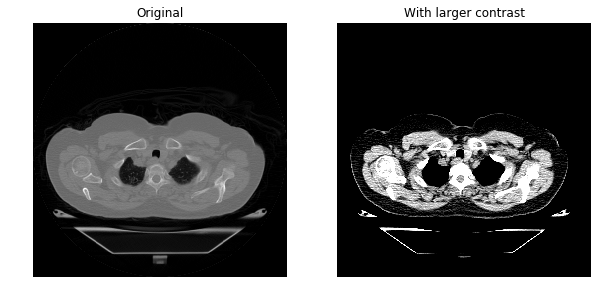

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,10))
ax[0].imshow(files[img_no], cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(im, cmap='gray', vmin=-100, vmax=100)
ax[1].set_title('With larger contrast')
ax[0].axis('off')
ax[1].axis('off')

In [7]:
print('Sampling', im.meta['sampling'])
print('Modality' , im.meta['Modality'])
print('Sex', im.meta['PatientSex'])

Sampling (0.976562, 0.976562)
Modality CT
Sex F 


## Stacking images, Loading volumes

Stack images of multidimentional data 

In [38]:
# Stacking the whole chest images with np.stack
vol = np.stack([files[0], files[1], files[3], files[4]])
print('Dimentional Volume:', vol.shape)

Dimentional Volume: (4, 512, 512)


## Slicing a 3D image

The simplest way to plot 3D and 4D images is by slicing them into many 2D frames. 

A 'fly-through' effect is created by plotting many slices sequentially.

In [52]:
vol.shape

(4, 512, 512)

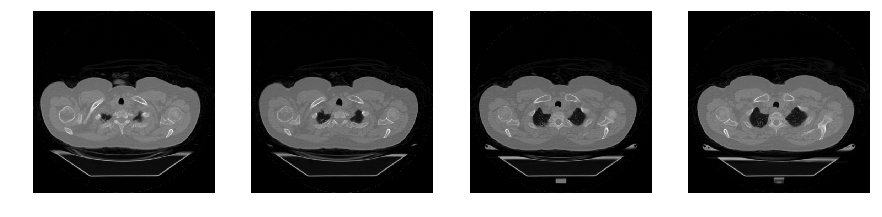

In [43]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10))

# Loop through subplots and draw image
for i in range(4):
    im = vol[i,:,:]
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
    
# Render the figure
plt.show()

### Using image aspect ratio

In [53]:
d0 = files[0].meta['sampling'][1]
d1 = files[1].meta['sampling'][1]
d2 = files[2].meta['sampling'][1]

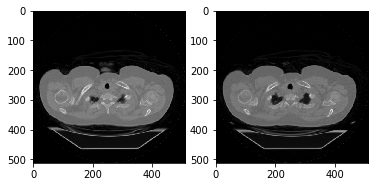

In [56]:
# # Select frame from "vol"
# im1 = vol[:, 256, :]
# im2 = vol[:, :, 256]

# # im1 = files[0]
# # im2 = files[1]

# # Compute aspect ratios
# asp1 = d0 / d2
# asp2 = d1 / d2

# # Plot the images on a subplots array 
# fig, axes = plt.subplots(nrows=1, ncols=2)
# axes[0].imshow(im1, cmap='gray', aspect=asp1)
# axes[1].imshow(im2, cmap='gray', aspect=asp2)
# plt.show()